In [1]:
import pandas as pd
import os


In [2]:

def get_video_data(host_folder) -> pd.DataFrame:
    # List files in output/{asset_id} dir
    df_list = []
    files = os.listdir(host_folder)
    for file in files:
        if file.endswith('.json'):
            print(file)
            path = f'{host_folder}/{file}'
            df_data = pd.read_json(path)
            df_list.append(df_data)

    df = pd.concat(df_list)
    
    return df
    
    
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    # Create an empty list to store the parsed data
    inner_data = []

    for index, row in df.iterrows():
        # Load the JSON data from the 'data' column
        data = row['data']
        
        for result in data['results']:
            result['frame_number'] = data['frame_number']
            result['original_frame'] = data['original_frame']
            result['s3_path'] = data['s3_path']
            result['fps'] = row['fps']
            
            result['total_frames'] = row['total_frames']
            result['annotated_video'] = row['annotated_video']
            
            inner_data.append(result)

    # Create a DataFrame from the flattened list of dictionaries
    data_df = pd.json_normalize(inner_data)

    return data_df





In [ ]:
# df_c = clean_data(df)
# print(df_c.shape)
# df_c.head()

In [ ]:
# df_join = df.join(df_c)
# # Remove "data" column from the DataFrame
# df_join = df_join.drop(columns=['data'])
# print(df_join.shape)
# df_join.head()

In [3]:
import pandas as pd

In [4]:
data_path = '../data/outputs/data.csv'


tasks_df = pd.read_csv(data_path)
tasks_df.head()


id                              video_id   status  chunk_id  \
0  927839243  5049e5f6-ec91-4afb-b2f5-a63a991a7993  pending         0   
1  540969006  5049e5f6-ec91-4afb-b2f5-a63a991a7993  pending         1   
2  748491783  5049e5f6-ec91-4afb-b2f5-a63a991a7993  pending         2   
3  728784689  5049e5f6-ec91-4afb-b2f5-a63a991a7993  pending         3   
4  243874323  5049e5f6-ec91-4afb-b2f5-a63a991a7993  pending         4   

   total_frames  fps                                   remote_data_path  \
0          4350   29  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...   
1          4350   29  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...   
2          4350   29  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...   
3          4350   29  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...   
4          4350   29  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...   

                                annotated_video_path  
0  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...  
1  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...  
2  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...  
3  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...  
4  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...

In [8]:

video_id = '5049e5f6-ec91-4afb-b2f5-a63a991a7993'
df_target = tasks_df[tasks_df['video_id'] == video_id ]


df_target.shape

(5, 8)

In [9]:
df_target.head()

id                              video_id   status  chunk_id  \
0  927839243  5049e5f6-ec91-4afb-b2f5-a63a991a7993  pending         0   
1  540969006  5049e5f6-ec91-4afb-b2f5-a63a991a7993  pending         1   
2  748491783  5049e5f6-ec91-4afb-b2f5-a63a991a7993  pending         2   
3  728784689  5049e5f6-ec91-4afb-b2f5-a63a991a7993  pending         3   
4  243874323  5049e5f6-ec91-4afb-b2f5-a63a991a7993  pending         4   

   total_frames  fps                                   remote_data_path  \
0          4350   29  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...   
1          4350   29  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...   
2          4350   29  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...   
3          4350   29  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...   
4          4350   29  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...   

                                annotated_video_path  
0  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...  
1  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...  
2  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...  
3  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...  
4  5049e5f6-ec91-4afb-b2f5-a63a991a7993/tmp8_r9na...

In [30]:
# minip
from minio import Minio

client = Minio("0.0.0.0:9000",  # Replace with your MinIO storage address
    access_key = "minioadmin",   # Replace with your access key
    secret_key = "minioadmin",    # Replace with your secret key
    secure = False
)

bucket_name = "my-bucket"

In [11]:
# Iterate over rows and convert each row to a dictionary
host_folder = './tmp/'

for index, row in df_target.iterrows():
    row_dict = row.to_dict()
    
    filename = row_dict['remote_data_path'].split("/")[-1]
    file =  row_dict['remote_data_path']
    # Process data
    output_file_path =  f'./tmp/{filename}'
    client.fget_object(bucket_name, file, output_file_path)    
    
df_tasks = get_video_data( host_folder =  host_folder)

df_tasks.head()

tmp8_r9nace_chunk_2_of_4350.mp4_results.json
tmp8_r9nace_chunk_3_of_4350.mp4_results.json
tmp8_r9nace_chunk_1_of_4350.mp4_results.json
tmp8_r9nace_chunk_0_of_4350.mp4_results.json
tmp8_r9nace_chunk_4_of_4350.mp4_results.json


annotated_video  total_frames  \
0  tmp8_r9nace_chunk_2_of_4350_annotated.mp4          4350   
1  tmp8_r9nace_chunk_2_of_4350_annotated.mp4          4350   
2  tmp8_r9nace_chunk_2_of_4350_annotated.mp4          4350   
3  tmp8_r9nace_chunk_2_of_4350_annotated.mp4          4350   
4  tmp8_r9nace_chunk_2_of_4350_annotated.mp4          4350   

                                                data  fps  
0  {'results': [{'name': 'car', 'class': 2, 'conf...   29  
1  {'results': [{'name': 'car', 'class': 2, 'conf...   29  
2  {'results': [{'name': 'car', 'class': 2, 'conf...   29  
3  {'results': [{'name': 'car', 'class': 2, 'conf...   29  
4  {'results': [{'name': 'car', 'class': 2, 'conf...   29

In [12]:
df_c = clean_data(df_tasks)
print(df_c.shape)
df_c.head()

(135300, 14)


name  class  confidence  track_id  frame_number  \
0     car      2     0.84253         1             0   
1     car      2     0.55709         3             0   
2     car      2     0.66877         4             0   
3     bus      5     0.13255        56             0   
4  person      0     0.38228        50             0   

                                      original_frame  \
0  tmp8_r9nace_chunk_2_of_4350_annotated_images/t...   
1  tmp8_r9nace_chunk_2_of_4350_annotated_images/t...   
2  tmp8_r9nace_chunk_2_of_4350_annotated_images/t...   
3  tmp8_r9nace_chunk_2_of_4350_annotated_images/t...   
4  tmp8_r9nace_chunk_2_of_4350_annotated_images/t...   

                                             s3_path  fps  total_frames  \
0  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
1  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
2  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
3  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
4  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   

                             annotated_video     box.x1     box.y1     box.x2  \
0  tmp8_r9nace_chunk_2_of_4350_annotated.mp4  334.07565   48.26264  405.30865   
1  tmp8_r9nace_chunk_2_of_4350_annotated.mp4  375.12015   38.97644  418.67746   
2  tmp8_r9nace_chunk_2_of_4350_annotated.mp4  411.59988   31.60214  434.65320   
3  tmp8_r9nace_chunk_2_of_4350_annotated.mp4   68.63795   67.93243  316.96194   
4  tmp8_r9nace_chunk_2_of_4350_annotated.mp4  259.65268  115.14301  310.29587   

      box.y2  
0   87.45946  
1   64.04517  
2   51.49309  
3  224.10532  
4  199.90434

In [23]:
# Save to csv
df_c.to_csv('./tmp/clean_tmps.csv', index=False)

## READ DATA

In [12]:
# Load csv again
import pandas as pd

df_c = pd.read_csv('./tmp/clean_tmps.csv')
print(df_c.shape)

(135300, 17)


In [13]:
df_c[df_c['name'] == 'car'].shape

(91493, 17)

In [14]:
df_c['original_frame'][0]

'tmp8_r9nace_chunk_0_of_4350_annotated_images/tmp8_r9nace_chunk_0_of_4350_annotated_0.jpg'

In [15]:
import re

def extract_chunk_and_annotated(filename: str) -> dict:
    # Use regular expressions to find the chunk and annotated values
    chunk_match = re.search(r'chunk_(\d+)', filename)
    annotated_match = re.search(r'annotated_(\d+)', filename)
    
    if chunk_match and annotated_match:
        chunk_value = int(chunk_match.group(1))
        annotated_value = int(annotated_match.group(1))
        return {'chunk': chunk_value, 'annotated': annotated_value}
    else:
        raise ValueError("Chunk or annotated value not found in the filename")

# Example usage
result = extract_chunk_and_annotated(df_c['original_frame'][0])
print(result)

{'chunk': 0, 'annotated': 0}


In [16]:
df_c['metric'] = df_c['original_frame'].apply(lambda x : extract_chunk_and_annotated(x))

# If you want to split the dictionary into separate columns
df_c['chunk'] = df_c['metric'].apply(lambda x: x['chunk'])
df_c['annotated'] = df_c['metric'].apply(lambda x: x['annotated'])

# Optionally drop the 'metric' column if not needed anymore
df_c.drop(columns=['metric'], inplace=True)

In [17]:
df_c.head()

index name  class  confidence  track_id  frame_number  \
0  81718  car      2     0.88141         1             0   
1  81719  car      2     0.64626         3             0   
2  81720  car      2     0.63741         4             0   
3  81721  bus      5     0.49716        85             0   
4  81722  car      2     0.68225       158             0   

                                      original_frame  \
0  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
1  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
2  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
3  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
4  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   

                                             s3_path  fps  total_frames  \
0  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
1  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
2  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
3  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
4  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   

                             annotated_video     box.x1    box.y1     box.x2  \
0  tmp8_r9nace_chunk_0_of_4350_annotated.mp4  334.22635  47.72169  405.06653   
1  tmp8_r9nace_chunk_0_of_4350_annotated.mp4  373.91360  38.47799  418.34357   
2  tmp8_r9nace_chunk_0_of_4350_annotated.mp4  412.09094  31.29582  435.18265   
3  tmp8_r9nace_chunk_0_of_4350_annotated.mp4   76.33698  65.57970  320.43726   
4  tmp8_r9nace_chunk_0_of_4350_annotated.mp4  335.12869  25.58342  372.05667   

      box.y2  chunk  annotated  
0   87.59734      0          0  
1   64.73465      0          0  
2   51.47420      0          0  
3  227.89771      0          0  
4   42.38772      0          0

In [18]:
print(df_c[df_c['chunk'] == 0]['annotated'].max())
print(df_c[df_c['chunk'] == 1]['annotated'].max())
print(df_c[df_c['chunk'] == 2]['annotated'].max())
print(df_c[df_c['chunk'] == 3]['annotated'].max())

4349
4349
4349
4349


In [19]:
import matplotlib.pyplot as plt


In [20]:
# Sort the DataFrame by 'chunk' and 'annotated'
df_c.sort_values(by=['chunk', 'annotated'], inplace=True, ascending=True)
df_c.reset_index(inplace=True)

In [21]:
df_c.head()

level_0  index name  class  confidence  track_id  frame_number  \
0        0  81718  car      2     0.88141         1             0   
1        1  81719  car      2     0.64626         3             0   
2        2  81720  car      2     0.63741         4             0   
3        3  81721  bus      5     0.49716        85             0   
4        4  81722  car      2     0.68225       158             0   

                                      original_frame  \
0  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
1  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
2  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
3  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
4  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   

                                             s3_path  fps  total_frames  \
0  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
1  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
2  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
3  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
4  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   

                             annotated_video     box.x1    box.y1     box.x2  \
0  tmp8_r9nace_chunk_0_of_4350_annotated.mp4  334.22635  47.72169  405.06653   
1  tmp8_r9nace_chunk_0_of_4350_annotated.mp4  373.91360  38.47799  418.34357   
2  tmp8_r9nace_chunk_0_of_4350_annotated.mp4  412.09094  31.29582  435.18265   
3  tmp8_r9nace_chunk_0_of_4350_annotated.mp4   76.33698  65.57970  320.43726   
4  tmp8_r9nace_chunk_0_of_4350_annotated.mp4  335.12869  25.58342  372.05667   

      box.y2  chunk  annotated  
0   87.59734      0          0  
1   64.73465      0          0  
2   51.47420      0          0  
3  227.89771      0          0  
4   42.38772      0          0

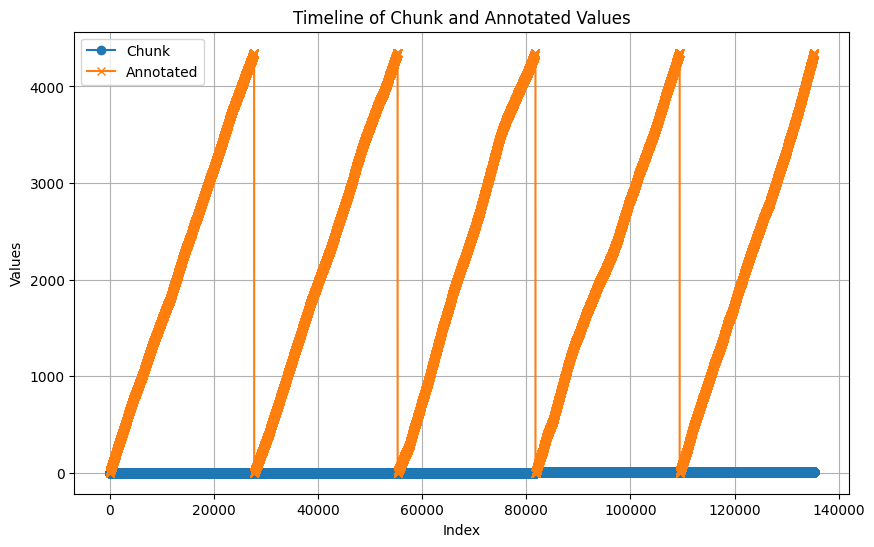

In [22]:

# Plot the timeline
plt.figure(figsize=(10, 6))
plt.plot(df_c.index, df_c['chunk'], marker='o', label='Chunk')
plt.plot(df_c.index, df_c['annotated'], marker='x', label='Annotated')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Timeline of Chunk and Annotated Values')
plt.legend()
plt.grid(True)
plt.show()

<Axes: >

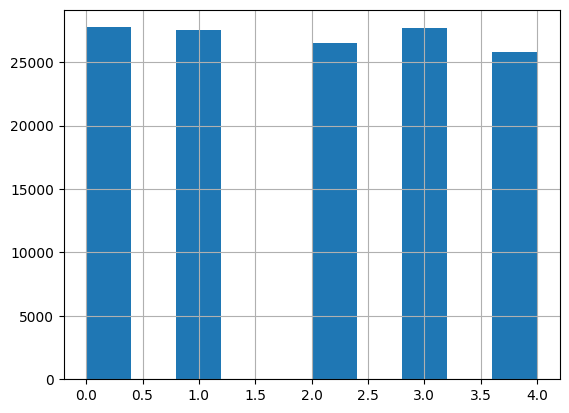

In [23]:
df_c['chunk'].hist()

In [24]:
# Initialize 'fixed_annotated' with the same values as 'annotated'
df_c['fixed_annotated'] = df_c['annotated']

# Calculate the cumulative max annotated for each chunk
max_annotated_per_chunk = df_c.groupby('chunk')['annotated'].max().shift(fill_value=0).cumsum()
chunk_offsets = max_annotated_per_chunk.to_dict()

# Adjust the fixed_annotated values
cumulative_offset = 0
previous_chunk = -1

for index, row in df_c.iterrows():
    current_chunk = row['chunk']
    if current_chunk != previous_chunk:
        cumulative_offset = chunk_offsets[current_chunk]
        previous_chunk = current_chunk
    df_c.at[index, 'fixed_annotated'] += cumulative_offset

# Verify the result
df_c.head(20)

level_0  index    name  class  confidence  track_id  frame_number  \
0         0  81718     car      2     0.88141         1             0   
1         1  81719     car      2     0.64626         3             0   
2         2  81720     car      2     0.63741         4             0   
3         3  81721     bus      5     0.49716        85             0   
4         4  81722     car      2     0.68225       158             0   
5         5  81723     car      2     0.88181         1             1   
6         6  81724     car      2     0.65739         3             1   
7         7  81725     car      2     0.60708         4             1   
8         8  81726     bus      5     0.42225        85             1   
9         9  81727     car      2     0.67545       158             1   
10       10  81728  person      0     0.64764       169             1   
11       11  81729     car      2     0.88067         1             2   
12       12  81730     car      2     0.66193         3             2   
13       13  81731     car      2     0.60411         4             2   
14       14  81732     bus      5     0.42905        85             2   
15       15  81733     car      2     0.67255       158             2   
16       16  81734  person      0     0.64772       169             2   
17       17  81735     car      2     0.88067         1             3   
18       18  81736     car      2     0.66230         3             3   
19       19  81737     car      2     0.60415         4             3   

                                       original_frame  \
0   tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
1   tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
2   tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
3   tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
4   tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
5   tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
6   tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
7   tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
8   tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
9   tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
10  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
11  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
12  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
13  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
14  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
15  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
16  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
17  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
18  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
19  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   

                                              s3_path  fps  total_frames  \
0   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
1   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
2   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
3   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
4   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
5   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
6   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
7   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
8   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
9   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
10  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
11  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
12  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
13  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
14  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
15  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   

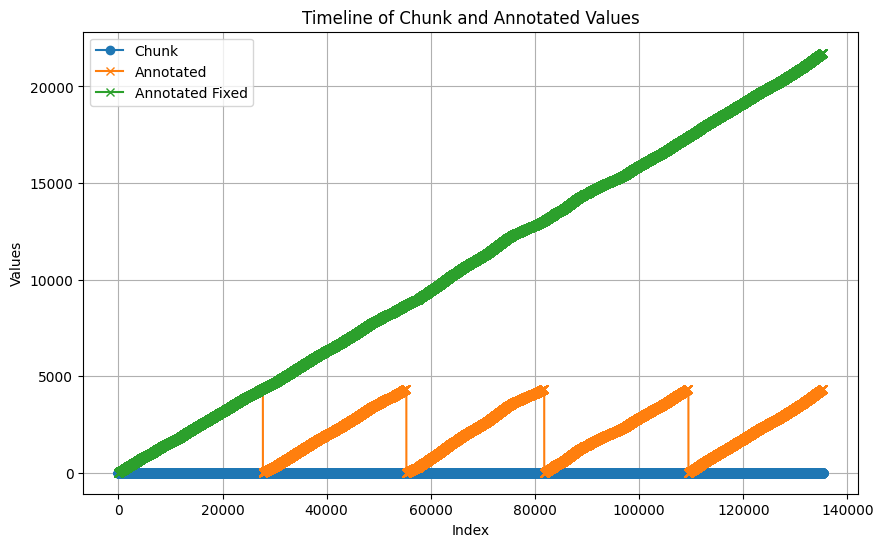

In [13]:
# Plot the timeline
plt.figure(figsize=(10, 6))
plt.plot(df_c.index, df_c['chunk'], marker='o', label='Chunk')
plt.plot(df_c.index, df_c['annotated'], marker='x', label='Annotated')
plt.plot(df_c.index, df_c['fixed_annotated'], marker='x', label='Annotated Fixed')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Timeline of Chunk and Annotated Values')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
df_c[df_c['chunk'] == 3]

level_0  index    name  class  confidence  track_id  frame_number  \
81777     81777  26477     car      2     0.76745         1             0   
81778     81778  26478     car      2     0.54708         3             0   
81779     81779  26479     car      2     0.59679         4             0   
81780     81780  26480   truck      7     0.48604        85             0   
81781     81781  26481     car      2     0.64434        93             0   
...         ...    ...     ...    ...         ...       ...           ...   
109463   109463  54163     car      2     0.66861         3          4349   
109464   109464  54164     car      2     0.63138         4          4349   
109465   109465  54165   truck      7     0.49148        85          4349   
109466   109466  54166     car      2     0.69805       124          4349   
109467   109467  54167  person      0     0.77177       129          4349   

                                           original_frame  \
81777   tmp8_r9nace_chunk_3_of_4350_annotated_images/t...   
81778   tmp8_r9nace_chunk_3_of_4350_annotated_images/t...   
81779   tmp8_r9nace_chunk_3_of_4350_annotated_images/t...   
81780   tmp8_r9nace_chunk_3_of_4350_annotated_images/t...   
81781   tmp8_r9nace_chunk_3_of_4350_annotated_images/t...   
...                                                   ...   
109463  tmp8_r9nace_chunk_3_of_4350_annotated_images/t...   
109464  tmp8_r9nace_chunk_3_of_4350_annotated_images/t...   
109465  tmp8_r9nace_chunk_3_of_4350_annotated_images/t...   
109466  tmp8_r9nace_chunk_3_of_4350_annotated_images/t...   
109467  tmp8_r9nace_chunk_3_of_4350_annotated_images/t...   

                                                  s3_path  fps  total_frames  \
81777   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
81778   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
81779   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
81780   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
81781   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
...                                                   ...  ...           ...   
109463  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
109464  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
109465  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
109466  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
109467  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   

                                  annotated_video     box.x1     box.y1  \
81777   tmp8_r9nace_chunk_3_of_4350_annotated.mp4  333.71887   47.97743   
81778   tmp8_r9nace_chunk_3_of_4350_annotated.mp4  373.17416   38.21548   
81779   tmp8_r9nace_chunk_3_of_4350_annotated.mp4  410.68213   31.33529   
81780   tmp8_r9nace_chunk_3_of_4350_annotated.mp4   77.78449   64.52846   
81781   tmp8_r9nace_chunk_3_of_4350_annotated.mp4  335.16104   25.47108   
...                                           ...        ...        ...   
109463  tmp8_r9nace_chunk_3_of_4350_annotated.mp4  373.88541   38.58359   
109464  tmp8_r9nace_chunk_3_of_4350_annotated.mp4  410.33173   31.24520   
109465  tmp8_r9nace_chunk_3_of_4350_annotated.mp4   74.54683   65.89100   
109466  tmp8_r9nace_chunk_3_of_4350_annotated.mp4  335.56973   25.38542   
109467  tmp8_r9nace_chunk_3_of_4350_annotated.mp4  254.55661  111.93462   

           box.x2     box.y2  chunk  annotated  fixed_annotated  
81777   403.74744   89.38133      3          0            13047  
81778   418.57983   63.68131      3          0            13047  
81779   434.96704   50.96645      3          0            13047  
81780   318.62054  223.43161      3          0            13047  
81781   370.72980   42.31997      3          0            13047  
...           ...        ...    ...        ...              ...  
109463  418.44894   63.937

In [15]:
# Calculate the total length of the video in seconds
total_frames = df_c['fixed_annotated'].max()
total_seconds = total_frames / 30  # Assuming 30 fps

# Function to convert seconds to HH:MM:ss format
def seconds_to_hhmmss(seconds):
    hh = int(seconds // 3600)
    mm = int((seconds % 3600) // 60)
    ss = int(seconds % 60)
    return f"{hh:02}:{mm:02}:{ss:02}"

# Create the 'timestamp' column
df_c['timestamp'] = df_c['fixed_annotated'].apply(lambda x: seconds_to_hhmmss(x / 30))


In [39]:
df_c.tail()

level_0   index   name  class  confidence  track_id  frame_number  \
135295   135295  135295    car      2     0.87397         1          4349   
135296   135296  135296    car      2     0.63603         3          4349   
135297   135297  135297    car      2     0.62703         4          4349   
135298   135298  135298  truck      7     0.67872        85          4349   
135299   135299  135299    car      2     0.69682       158          4349   

                                           original_frame  \
135295  tmp8_r9nace_chunk_4_of_4350_annotated_images/t...   
135296  tmp8_r9nace_chunk_4_of_4350_annotated_images/t...   
135297  tmp8_r9nace_chunk_4_of_4350_annotated_images/t...   
135298  tmp8_r9nace_chunk_4_of_4350_annotated_images/t...   
135299  tmp8_r9nace_chunk_4_of_4350_annotated_images/t...   

                                                  s3_path  fps  total_frames  \
135295  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
135296  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
135297  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
135298  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
135299  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   

                                  annotated_video     box.x1    box.y1  \
135295  tmp8_r9nace_chunk_4_of_4350_annotated.mp4  334.08524  47.86750   
135296  tmp8_r9nace_chunk_4_of_4350_annotated.mp4  372.81845  38.48228   
135297  tmp8_r9nace_chunk_4_of_4350_annotated.mp4  410.21280  30.88890   
135298  tmp8_r9nace_chunk_4_of_4350_annotated.mp4   73.38110  65.69290   
135299  tmp8_r9nace_chunk_4_of_4350_annotated.mp4  334.99936  25.41467   

           box.x2     box.y2  chunk  annotated  fixed_annotated timestamp  
135295  405.23352   86.79787      4       4349            21745  00:12:04  
135296  418.48779   65.22478      4       4349            21745  00:12:04  
135297  434.93839   51.35523      4       4349            21745  00:12:04  
135298  327.41281  227.01698      4       4349            21745  00:12:04  
135299  371.60590   42.34750      4       4349            21745  00:12:04

In [16]:
# Remove repeted rows based on frame_number

df_c_rr = df_c.drop_duplicates(subset=['frame_number', 'class', 'track_id'], keep='first')

print(df_c.shape)
print(df_c_rr.shape)

(135300, 20)
(74837, 20)


In [17]:
df_c_rr.head()

level_0  index name  class  confidence  track_id  frame_number  \
0        0  81718  car      2     0.88141         1             0   
1        1  81719  car      2     0.64626         3             0   
2        2  81720  car      2     0.63741         4             0   
3        3  81721  bus      5     0.49716        85             0   
4        4  81722  car      2     0.68225       158             0   

                                      original_frame  \
0  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
1  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
2  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
3  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
4  tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   

                                             s3_path  fps  total_frames  \
0  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
1  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
2  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
3  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
4  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   

                             annotated_video     box.x1    box.y1     box.x2  \
0  tmp8_r9nace_chunk_0_of_4350_annotated.mp4  334.22635  47.72169  405.06653   
1  tmp8_r9nace_chunk_0_of_4350_annotated.mp4  373.91360  38.47799  418.34357   
2  tmp8_r9nace_chunk_0_of_4350_annotated.mp4  412.09094  31.29582  435.18265   
3  tmp8_r9nace_chunk_0_of_4350_annotated.mp4   76.33698  65.57970  320.43726   
4  tmp8_r9nace_chunk_0_of_4350_annotated.mp4  335.12869  25.58342  372.05667   

      box.y2  chunk  annotated  fixed_annotated timestamp  
0   87.59734      0          0                0  00:00:00  
1   64.73465      0          0                0  00:00:00  
2   51.47420      0          0                0  00:00:00  
3  227.89771      0          0                0  00:00:00  
4   42.38772      0          0                0  00:00:00

In [18]:
# Group by 'timestamp' and convert to a dictionary
# grouped = df_c.groupby('timestamp').apply(lambda x: x.to_dict(orient='records')).to_dict()



In [31]:
df_c_rrr = df_c_rr[['confidence', 'frame_number', 'track_id', 'name', 'class', 's3_path', 'timestamp']]

all_classes = df_c_rrr['class'].unique()
all_names = df_c_rrr['name'].unique()
print(all_classes)
print(all_names)

[ 2  5  0  7  4  3  1 21  9 19 16 17  6 24 26 28  8 20 10]
['car' 'bus' 'person' 'truck' 'airplane' 'motorcycle' 'bicycle' 'bear'
 'traffic light' 'cow' 'dog' 'horse' 'train' 'backpack' 'handbag'
 'suitcase' 'boat' 'elephant' 'fire hydrant']


In [37]:
import json

# Assuming df_c_rrr is your DataFrame
def aggregate_groups(group):
    return {
        "names": group["name"].unique().tolist(),
        "classes": group["class"].unique().tolist(),
        "data": group.to_dict(orient="records")
    }

grouped = df_c_rrr.groupby("timestamp", group_keys=False).apply(aggregate_groups).to_dict()
print(grouped.keys())


dict_keys(['00:00:00', '00:00:01', '00:00:02', '00:00:03', '00:00:04', '00:00:05', '00:00:06', '00:00:07', '00:00:08', '00:00:09', '00:00:10', '00:00:11', '00:00:12', '00:00:13', '00:00:14', '00:00:15', '00:00:16', '00:00:17', '00:00:18', '00:00:19', '00:00:20', '00:00:21', '00:00:22', '00:00:23', '00:00:24', '00:00:25', '00:00:26', '00:00:27', '00:00:28', '00:00:29', '00:00:30', '00:00:31', '00:00:32', '00:00:33', '00:00:34', '00:00:35', '00:00:36', '00:00:37', '00:00:38', '00:00:39', '00:00:40', '00:00:41', '00:00:42', '00:00:43', '00:00:44', '00:00:45', '00:00:46', '00:00:47', '00:00:48', '00:00:49', '00:00:50', '00:00:51', '00:00:52', '00:00:53', '00:00:54', '00:00:55', '00:00:56', '00:00:57', '00:00:58', '00:00:59', '00:01:00', '00:01:01', '00:01:02', '00:01:03', '00:01:04', '00:01:05', '00:01:06', '00:01:07', '00:01:08', '00:01:09', '00:01:10', '00:01:11', '00:01:12', '00:01:13', '00:01:14', '00:01:15', '00:01:16', '00:01:17', '00:01:18', '00:01:19', '00:01:20', '00:01:21', '00:0

/var/folders/cp/wr66qlws0zd28j5dnx0fxhz00000gn/T/ipykernel_19321/1204548934.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df_c_rrr.groupby("timestamp", group_keys=False).apply(aggregate_groups).to_dict()


In [40]:
all_classes = df_c_rrr['class'].unique()
all_names = df_c_rrr['name'].unique()

final_data = {
    "ground_detections": grouped,
    "original_video": "https://s3.amazonaws.com/groundtruth-ai/5049e5f6-ec91-4afb-b2f5-a63a991a7993.mp4",
    "annotated_video": "https://s3.amazonaws.com/groundtruth-ai/5049e5f6-ec91-4afb-b2f5-a63a991a7993.mp4",
    "all_classes": all_classes.tolist(),
    "all_names": all_names.tolist()
}



In [42]:
# Output the result to JSON
output_json = json.dumps(final_data, indent=4)

# Save the JSON to a file
with open('./tmp/output_json_timestamp.json', 'w') as f:
    f.write(output_json)

### Video JOIN based on annotated videos

In [27]:
bucket_name = "my-bucket"


In [28]:
df_video = df_c.drop_duplicates(subset=['annotated_video'], keep='first')
print(df_video.shape)
df_video.head()

(5, 19)


level_0   index name  class  confidence  track_id  frame_number  \
0             0   81718  car      2     0.88141         1             0   
27750     27750   54168  car      2     0.87699         1             0   
55300     55300       0  car      2     0.84253         1             0   
81777     81777   26477  car      2     0.76745         1             0   
109468   109468  109468  car      2     0.87663         1             0   

                                           original_frame  \
0       tmp8_r9nace_chunk_0_of_4350_annotated_images/t...   
27750   tmp8_r9nace_chunk_1_of_4350_annotated_images/t...   
55300   tmp8_r9nace_chunk_2_of_4350_annotated_images/t...   
81777   tmp8_r9nace_chunk_3_of_4350_annotated_images/t...   
109468  tmp8_r9nace_chunk_4_of_4350_annotated_images/t...   

                                                  s3_path  fps  total_frames  \
0       5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
27750   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
55300   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
81777   5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   
109468  5049e5f6-ec91-4afb-b2f5-a63a991a7993/images/tm...   29          4350   

                                  annotated_video     box.x1    box.y1  \
0       tmp8_r9nace_chunk_0_of_4350_annotated.mp4  334.22635  47.72169   
27750   tmp8_r9nace_chunk_1_of_4350_annotated.mp4  334.16885  47.66764   
55300   tmp8_r9nace_chunk_2_of_4350_annotated.mp4  334.07565  48.26264   
81777   tmp8_r9nace_chunk_3_of_4350_annotated.mp4  333.71887  47.97743   
109468  tmp8_r9nace_chunk_4_of_4350_annotated.mp4  334.06604  48.05791   

           box.x2    box.y2  chunk  annotated  fixed_annotated  
0       405.06653  87.59734      0          0                0  
27750   405.23004  88.05524      1          0             4349  
55300   405.30865  87.45946      2          0             8698  
81777   403.74744  89.38133      3          0            13047  
109468  404.64740  88.00053      4          0            17396

In [35]:
from tqdm import tqdm

# Join video
video_id = '5049e5f6-ec91-4afb-b2f5-a63a991a7993'

video_output_paths = []
for index, row in tqdm(df_video.iterrows()):
    row_dict = row.to_dict()
    
    filename = row_dict['annotated_video'].split("/")[-1]
    file =  f"{video_id}/{row_dict['annotated_video']}"
    # Process data
    output_file_path =  f'./tmp/{filename}'
    
    video_output_paths.append(output_file_path)
    client.fget_object(bucket_name, file, output_file_path)


5it [00:00,  7.58it/s]


In [36]:
import cv2
import os

def get_video_properties(video_path):
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    cap.release()
    return width, height, fps

def join_videos(video_list, output_path):
    if not video_list:
        print("No videos to join")
        return
    
    # Get properties from the first video
    width, height, fps = get_video_properties(video_list[0])
    
    # Create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    for video_path in video_list:
        cap = cv2.VideoCapture(video_path)
        
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            out.write(frame)
        
        cap.release()
    
    out.release()
    print(f"Output video saved as {output_path}")

# List of video paths
video_list = video_output_paths

# Output video path
output_path = './tmp/output_video.mp4'

# Join videos
join_videos(video_list, output_path)

Output video saved as ./tmp/output_video.mp4


# SETUP 

# 

In [1]:
# add to python PATH the "libs" folder 
import sys
sys.path.append('..')

from libs.clean_data import ProcessData
from libs.video_handler import VideoHandler

from minio import Minio
import pandas as pd

In [2]:
queue  = [{
            "info_path": f"8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_{i}_of_6_results.json" 
            }
          for i in range(1, 7)
        ]


In [3]:


# Minio client
minio_client = Minio("0.0.0.0:9000",  # Replace with your MinIO storage address
    access_key = "minioadmin",   # Replace with your access key
    secret_key = "minioadmin",    # Replace with your secret key
    secure = False
)
output_folder = './tmp'
bucket_name = "my-bucket"
data_handler = ProcessData()
video_handler = VideoHandler( output_folder = output_folder)


In [4]:
bucket_name = "my-bucket"
output_folder = './tmp/'
get_video_id = lambda x: x.split("/")[0]
get_file_name = lambda x: x.split("/")[-1]

dfs = pd.DataFrame()
output_files = []
for q in queue:
    # pprint(q)
    object_name = q['info_path']

    video_id = get_video_id(object_name)
    file_name = get_file_name(object_name)
    
    print(video_id)
    output_folder = f'./tmp/{video_id}'
    file_output_path = f'{output_folder}/{file_name}'
    minio_client.fget_object(bucket_name, object_name, file_output_path)
    output_files.append(file_output_path)
    
    # file_path:str, video_id, status:
    df = data_handler.create_data_task( object_name, file_output_path,  video_id, status = 'pending')
    dfs = pd.concat([dfs, df])

dfs.head()


8d0a09c1-4d74-469e-947f-26d4dcf2bc85
8d0a09c1-4d74-469e-947f-26d4dcf2bc85
8d0a09c1-4d74-469e-947f-26d4dcf2bc85
8d0a09c1-4d74-469e-947f-26d4dcf2bc85
8d0a09c1-4d74-469e-947f-26d4dcf2bc85
8d0a09c1-4d74-469e-947f-26d4dcf2bc85


remote_path  \
0  8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_m...   
0  8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_m...   
0  8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_m...   
0  8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_m...   
0  8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_m...   

                                           file_path  \
0  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR...   
0  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR...   
0  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR...   
0  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR...   
0  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR...   

                               video_id   status  
0  8d0a09c1-4d74-469e-947f-26d4dcf2bc85  pending  
0  8d0a09c1-4d74-469e-947f-26d4dcf2bc85  pending  
0  8d0a09c1-4d74-469e-947f-26d4dcf2bc85  pending  
0  8d0a09c1-4d74-469e-947f-26d4dcf2bc85  pending  
0  8d0a09c1-4d74-469e-947f-26d4dcf2bc85  pending

In [5]:

df = data_handler.join_chunks(tasks_dir=output_files)
df = data_handler.create_annotations(df)
df = data_handler.join_frames(df)
df = data_handler.create_timestamps(df, fps=2.7)

print(df.shape)
df.head()

(4882, 19)


index name  class  confidence  track_id  frame_number  \
0      0  car      2     0.95431         1             0   
1      1  car      2     0.47745       220             0   
2      2  car      2     0.95009         1             1   
3      3  car      2     0.39906       220             1   
4      4  car      2     0.94935         1             2   

                                      original_frame  \
0  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR...   
1  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR...   
2  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR...   
3  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR...   
4  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR...   

                                             s3_path       fps  total_frames  \
0  8d0a09c1-4d74-469e-947f-26d4dcf2bc85/images/XV...  2.777778          1500   
1  8d0a09c1-4d74-469e-947f-26d4dcf2bc85/images/XV...  2.777778          1500   
2  8d0a09c1-4d74-469e-947f-26d4dcf2bc85/images/XV...  2.777778          1500   
3  8d0a09c1-4d74-469e-947f-26d4dcf2bc85/images/XV...  2.777778          1500   
4  8d0a09c1-4d74-469e-947f-26d4dcf2bc85/images/XV...  2.777778          1500   

                                     annotated_video      box.x1     box.y1  \
0  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR...  1294.84119  782.82684   
1  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR...  1100.54517  179.88763   
2  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR...  1294.24597  785.37476   
3  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR...  1101.08289  180.13708   
4  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR...  1294.57288  786.63708   

       box.x2      box.y2  chunk  annotated  fixed_annotated timestamp  
0  2140.83496  1427.61633      1          0                0  00:00:00  
1  1151.13745   205.76996      1          0                0  00:00:00  
2  2145.83032  1427.62988      1          1                1  00:00:00  
3  1151.93445   205.64694      1          1                1  00:00:00  
4  2146.14624  1427.93518      1          2                2  00:00:00

In [6]:
# download all the images from the s3_path

work_dir = './tmp'
df_videos = df.drop_duplicates(subset=['annotated_video'], keep='first')

df_videos['annotated_video'] = df_videos['annotated_video'].apply(lambda x: x.split("/")[-1])
df_videos['remote_annotated_video'] = df_videos['annotated_video'].apply(lambda x: f"{video_id}/{x}")
df_videos['local_annotated_video'] = df_videos['annotated_video'].apply(lambda x: f"{work_dir}/{video_id}/{x}")

videos_info_list = df_videos[['annotated_video', 'remote_annotated_video', 'local_annotated_video']].to_dict(orient='records')

print(videos_info_list)

[{'annotated_video': 'XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_annotated.mp4', 'remote_annotated_video': '8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_annotated.mp4', 'local_annotated_video': './tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_annotated.mp4'}, {'annotated_video': 'XVR_ch1_main_20210910141900_20210910142500_chunk_2_of_6_annotated.mp4', 'remote_annotated_video': '8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_2_of_6_annotated.mp4', 'local_annotated_video': './tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_2_of_6_annotated.mp4'}, {'annotated_video': 'XVR_ch1_main_20210910141900_20210910142500_chunk_3_of_6_annotated.mp4', 'remote_annotated_video': '8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_3_of_6_annotated.mp4', 'local_annotated_video': './

/var/folders/cp/wr66qlws0zd28j5dnx0fxhz00000gn/T/ipykernel_94211/366142760.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_videos['annotated_video'] = df_videos['annotated_video'].apply(lambda x: x.split("/")[-1])
/var/folders/cp/wr66qlws0zd28j5dnx0fxhz00000gn/T/ipykernel_94211/366142760.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_videos['remote_annotated_video'] = df_videos['annotated_video'].apply(lambda x: f"{video_id}/{x}")
/var/folders/cp/wr66qlws0zd28j5dnx0fxhz00000gn/T/ipykernel_942

In [12]:
videos_info_list[2]

{'annotated_video': 'XVR_ch1_main_20210910141900_20210910142500_chunk_3_of_6_annotated.mp4',
 'remote_annotated_video': '8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_3_of_6_annotated.mp4',
 'local_annotated_video': './tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_3_of_6_annotated.mp4'}

In [7]:

# Join videos
video_output_path_remote = video_handler.process(video_id, videos_info_list, minio_client, bucket_name)


S3 operation failed; code: NoSuchKey, message: Object does not exist, resource: /my-bucket/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/output_annotated_video.mp4, request_id: 17E772846CD29CFD, host_id: dd9025bab4ad464b049177c95eb6ebf374d3b3fd1af9251148b658df7ac2e3e8, bucket_name: my-bucket, object_name: 8d0a09c1-4d74-469e-947f-26d4dcf2bc85/output_annotated_video.mp4
Video build 8d0a09c1-4d74-469e-947f-26d4dcf2bc85/output_annotated_video.mp4 not found, building it now
Joining 6 videos
Working on video:  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_2_of_6_annotated.mp4
Working on video:  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_3_of_6_annotated.mp4
Working on video:  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_4_of_6_annotated.mp4
Working on video:  ./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_anno

In [ ]:

additional_data = {
    'annotated_video': video_output_path_remote,
    'original_video': 'https://s3.amazonaws.com/groundtruth-ai/5049e5f6-ec91-4afb-b2f5-a63a991a7993.mp4'
}

# remove duplicates
df = data_handler.remove_duplicates(df, conditions= ['frame_number', 'class', 'track_id'])
data_handler.create_aggregated_data(df, 
                                    keep_columns=['timestamp', 'class', 'name', 'track_id', 's3_path'], 
                                    output_path=f'{output_folder}output_json_timestamp.json', additional_data=additional_data)



In [14]:
import re

def sort_files_by_chunk(file_list):
    # Helper function to extract the chunk number
    def extract_chunk_number(file_path):
        # Use regular expression to find the "chunk_X_of_Y" pattern
        match = re.search(r'chunk_(\d+)_of_\d+', file_path)
        if match:
            # Return the chunk number as an integer
            return int(match.group(1))
        return 0  # Default to 0 if no match is found

    # Sort the list using the extracted chunk number
    sorted_list = sorted(file_list, key=extract_chunk_number)
    return sorted_list

# Example usage:
file_paths = [
    "./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_2_of_6_annotated.mp4",
    "./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_3_of_6_annotated.mp4",
    "./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_4_of_6_annotated.mp4",
    "./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_annotated.mp4",
    "./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_5_of_6_annotated.mp4",
    "./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_6_of_6_annotated.mp4"
]

sorted_files = sort_files_by_chunk(file_paths)

for p in sorted_files:
    print(p)


./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_annotated.mp4
./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_2_of_6_annotated.mp4
./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_3_of_6_annotated.mp4
./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_4_of_6_annotated.mp4
./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_5_of_6_annotated.mp4
./tmp/8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_6_of_6_annotated.mp4


In [2]:
from libs.api import ApiClient
api_client = ApiClient("http://127.0.0.1:8000")
data_handler = ProcessData()

In [3]:
previous_tasks = api_client.get_by_video_id("8d0a09c1-4d74-469e-947f-26d4dcf2bc85", status = 'pending')
previous_tasks

<Response [200]>

In [4]:
if previous_tasks is None:
    print("Some error occurred")
previous_tasks = previous_tasks.json()
if len(previous_tasks) == 0:
    print("No pending tasks")

print(previous_tasks)

[{'id': 4, 'remote_path': '8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_results.json', 'original_video': 'some video url', 'video_id': '8d0a09c1-4d74-469e-947f-26d4dcf2bc85', 'status': 'pending', 'fps': 2.7}, {'id': 5, 'remote_path': '8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_2_of_6_results.json', 'original_video': 'some video url', 'video_id': '8d0a09c1-4d74-469e-947f-26d4dcf2bc85', 'status': 'pending', 'fps': 2.7}, {'id': 6, 'remote_path': '8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_3_of_6_results.json', 'original_video': 'some video url', 'video_id': '8d0a09c1-4d74-469e-947f-26d4dcf2bc85', 'status': 'pending', 'fps': 2.7}, {'id': 7, 'remote_path': '8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_main_20210910141900_20210910142500_chunk_4_of_6_results.json', 'original_video': 'some video url', 'video_id': '8d0a09c1-4d74-469e-947f-26d4dcf2bc85', 'status':

In [5]:
df = data_handler.create_pandas_data(tasks = previous_tasks)

df.head()

id                                        remote_path  original_video  \
0   4  8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_m...  some video url   
1   5  8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_m...  some video url   
2   6  8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_m...  some video url   
3   7  8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_m...  some video url   
4   8  8d0a09c1-4d74-469e-947f-26d4dcf2bc85/XVR_ch1_m...  some video url   

                               video_id   status  fps  
0  8d0a09c1-4d74-469e-947f-26d4dcf2bc85  pending  2.7  
1  8d0a09c1-4d74-469e-947f-26d4dcf2bc85  pending  2.7  
2  8d0a09c1-4d74-469e-947f-26d4dcf2bc85  pending  2.7  
3  8d0a09c1-4d74-469e-947f-26d4dcf2bc85  pending  2.7  
4  8d0a09c1-4d74-469e-947f-26d4dcf2bc85  pending  2.7

In [8]:
ids_to_update = df['id'].tolist()
print(ids_to_update)

[4, 5, 6, 7, 8, 9]


In [10]:
update_data = {"status": "done"}

for id in ids_to_update:
    api_client.update_item_status(id, update_data)

In [14]:
previous_tasks = api_client.get_by_video_id("8d0a09c1-4d74-469e-947f-26d4dcf2bc85", status = 'pending')
previous_tasks.json()


{'detail': 'Items not found'}

: 

In [48]:
import os
import re
import pandas as pd
from glob import glob

In [49]:
video_id = 'a29615c3-9227-496e-b688-839ad828c898'

folder = os.path.join('../tmp', video_id)

print(folder)

../tmp/a29615c3-9227-496e-b688-839ad828c898


In [50]:
files = glob(f"{folder}/*_results.json")
print(files)
print(len(files))

['../tmp/a29615c3-9227-496e-b688-839ad828c898/XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_results.json', '../tmp/a29615c3-9227-496e-b688-839ad828c898/XVR_ch1_main_20210910141900_20210910142500_chunk_2_of_6_results.json', '../tmp/a29615c3-9227-496e-b688-839ad828c898/XVR_ch1_main_20210910141900_20210910142500_chunk_4_of_6_results.json', '../tmp/a29615c3-9227-496e-b688-839ad828c898/XVR_ch1_main_20210910141900_20210910142500_chunk_6_of_6_results.json', '../tmp/a29615c3-9227-496e-b688-839ad828c898/XVR_ch1_main_20210910141900_20210910142500_chunk_5_of_6_results.json', '../tmp/a29615c3-9227-496e-b688-839ad828c898/XVR_ch1_main_20210910141900_20210910142500_chunk_3_of_6_results.json']
6


In [51]:
df_list = []
for file in files:
    df_data = pd.read_json(file)
    df_list.append(df_data)

df =  pd.concat(df_list)
df.head()

annotated_video  total_frames  \
0  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...          1500   
1  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...          1500   
2  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...          1500   
3  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...          1500   
4  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...          1500   

                                                data  fps  
0  {'results': [{'name': 'car', 'class': 2, 'conf...   25  
1  {'results': [{'name': 'car', 'class': 2, 'conf...   25  
2  {'results': [{'name': 'car', 'class': 2, 'conf...   25  
3  {'results': [{'name': 'car', 'class': 2, 'conf...   25  
4  {'results': [{'name': 'car', 'class': 2, 'conf...   25

In [40]:
def clean_data( df: pd.DataFrame) -> pd.DataFrame:
    # Create an empty list to store the parsed data
    inner_data = []

    for index, row in df.iterrows():
        # Load the JSON data from the 'data' column
        data = row['data']
        
        for result in data['results']:
            result['frame_number'] = data['frame_number']
            result['original_frame'] = data['original_frame']
            result['s3_path'] = data['s3_path']
            result['fps'] = row['fps']
            
            result['total_frames'] = row['total_frames']
            result['annotated_video'] = row['annotated_video']
            
            inner_data.append(result)

    # Create a DataFrame from the flattened list of dictionaries
    return pd.json_normalize(inner_data)

def extract_chunk_and_annotated(filename: str) -> dict:
    # Use regular expressions to find the chunk and annotated values
    chunk_match = re.search(r'chunk_(\d+)', filename)
    total_chunks_match = re.search(r'of_(\d+)', filename)
    annotated_match = re.search(r'annotated_(\d+)', filename)
    
    if chunk_match and annotated_match and total_chunks_match:
        chunk_value = int(chunk_match.group(1))
        annotated_value = int(annotated_match.group(1))
        total_chunks_match = int(total_chunks_match.group(1))
        return {'chunk': chunk_value, 'annotated': annotated_value, 'total_chunks': total_chunks_match.group(1)}
    else:
        raise ValueError("Chunk or annotated value not found in the filename")

def create_annotations( df: pd.DataFrame) -> pd.DataFrame:
    
    df['metric'] = df['original_frame'].apply(lambda x : extract_chunk_and_annotated(x))
    # If you want to split the dictionary into separate columns
    df['chunk'] = df['metric'].apply(lambda x: x['chunk'])
    df['annotated'] = df['metric'].apply(lambda x: x['annotated'])
    # Optionally drop the 'metric' column if not needed anymore
    df.drop(columns=['metric'], inplace=True)

    # Sort the DataFrame by 'chunk' and 'annotated'
    df.sort_values(by=['chunk', 'annotated'], inplace=True, ascending=True)
    
    # Initialize 'fixed_annotated' with the same values as 'annotated'
    df['fixed_annotated'] = df['annotated']
    
    df.reset_index(inplace=True)

    return df

def join_frames(df: pd.DataFrame) -> pd.DataFrame:

    # Calculate the cumulative max annotated for each chunk
    max_annotated_per_chunk = df.groupby('chunk')['annotated'].max().shift(fill_value=0).cumsum()
    chunk_offsets = max_annotated_per_chunk.to_dict()

    # Adjust the fixed_annotated values
    cumulative_offset = 0
    previous_chunk = -1

    for index, row in df.iterrows():
        current_chunk = row['chunk']
        if current_chunk != previous_chunk:
            cumulative_offset = chunk_offsets[current_chunk]
            previous_chunk = current_chunk
        df.at[index, 'fixed_annotated'] += cumulative_offset
        
    return df


def create_timestamps(df: pd.DataFrame, fps: int) -> pd.DataFrame:
    # Calculate the total length of the video in seconds

    # Function to convert seconds to HH:MM:ss format
    def seconds_to_hhmmss(seconds):
        hh = int(seconds // 3600)
        mm = int((seconds % 3600) // 60)
        ss = int(seconds % 60)
        return f"{hh:02}:{mm:02}:{ss:02}"

    # Create the 'timestamp' column
    df['timestamp'] = df['fixed_annotated'].apply(lambda x: seconds_to_hhmmss(x / fps))
    
    return df

In [41]:
df = clean_data(df)
df = create_annotations(df)
df.head()

index name  class  confidence  track_id  frame_number  \
0      0  car      2     0.95142         1             0   
1      1  car      2     0.94831         1             1   
2      2  car      2     0.94834         1             2   
3      3  car      2     0.94839         1             3   
4      4  car      2     0.94774         1             4   

                                      original_frame  \
0  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
1  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
2  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
3  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
4  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   

                                             s3_path  fps  total_frames  \
0  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
1  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
2  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
3  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
4  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   

                                     annotated_video      box.x1     box.y1  \
0  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1295.10474  786.71179   
1  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1293.38757  786.56799   
2  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1293.03894  786.46625   
3  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1292.96936  786.38708   
4  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1292.99207  786.37555   

       box.x2      box.y2  chunk  total_chunks  annotated  fixed_annotated  
0  2146.90991  1427.33997      1             6          0                0  
1  2145.75879  1427.09094      1             6          1                1  
2  2145.63843  1427.00598      1             6          2                2  
3  2145.59277  1427.01196      1             6          3                3  
4  2146.68799  1427.04163      1             6          4                4

In [42]:
df = join_frames(df)
df.head()

index name  class  confidence  track_id  frame_number  \
0      0  car      2     0.95142         1             0   
1      1  car      2     0.94831         1             1   
2      2  car      2     0.94834         1             2   
3      3  car      2     0.94839         1             3   
4      4  car      2     0.94774         1             4   

                                      original_frame  \
0  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
1  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
2  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
3  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
4  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   

                                             s3_path  fps  total_frames  \
0  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
1  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
2  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
3  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
4  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   

                                     annotated_video      box.x1     box.y1  \
0  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1295.10474  786.71179   
1  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1293.38757  786.56799   
2  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1293.03894  786.46625   
3  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1292.96936  786.38708   
4  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1292.99207  786.37555   

       box.x2      box.y2  chunk  total_chunks  annotated  fixed_annotated  
0  2146.90991  1427.33997      1             6          0                0  
1  2145.75879  1427.09094      1             6          1                1  
2  2145.63843  1427.00598      1             6          2                2  
3  2145.59277  1427.01196      1             6          3                3  
4  2146.68799  1427.04163      1             6          4                4

In [43]:
df = create_timestamps(df, fps=25)

df.head()

index name  class  confidence  track_id  frame_number  \
0      0  car      2     0.95142         1             0   
1      1  car      2     0.94831         1             1   
2      2  car      2     0.94834         1             2   
3      3  car      2     0.94839         1             3   
4      4  car      2     0.94774         1             4   

                                      original_frame  \
0  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
1  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
2  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
3  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
4  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   

                                             s3_path  fps  total_frames  \
0  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
1  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
2  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
3  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
4  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   

                                     annotated_video      box.x1     box.y1  \
0  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1295.10474  786.71179   
1  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1293.38757  786.56799   
2  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1293.03894  786.46625   
3  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1292.96936  786.38708   
4  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1292.99207  786.37555   

       box.x2      box.y2  chunk  total_chunks  annotated  fixed_annotated  \
0  2146.90991  1427.33997      1             6          0                0   
1  2145.75879  1427.09094      1             6          1                1   
2  2145.63843  1427.00598      1             6          2                2   
3  2145.59277  1427.01196      1             6          3                3   
4  2146.68799  1427.04163      1             6          4                4   

  timestamp  
0  00:00:00  
1  00:00:00  
2  00:00:00  
3  00:00:00  
4  00:00:00

In [47]:
chunk_number = (df['chunk'].iloc[-1]).max()
max_chunks = df['total_chunks'].iloc[0]

print(chunk_number)
print(max_chunks)

6
6


In [44]:
df['chunk'].unique()

array([1, 2, 3, 4, 5, 6])

In [ ]:
df['timestamp'].unique()

In [12]:
import pandas as pd


df_test = pd.read_csv('../tmp/a29615c3-9227-496e-b688-839ad828c898/output_6_6.csv')

df_test.head()

index name  class  confidence  track_id  frame_number  \
0      0  car      2     0.95142         1             0   
1      1  car      2     0.94831         1             1   
2      2  car      2     0.94834         1             2   
3      3  car      2     0.94839         1             3   
4      4  car      2     0.94774         1             4   

                                      original_frame  \
0  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
1  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
2  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
3  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
4  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   

                                             s3_path  fps  total_frames  \
0  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
1  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
2  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
3  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
4  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   

                                     annotated_video      box.x1     box.y1  \
0  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1295.10474  786.71179   
1  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1293.38757  786.56799   
2  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1293.03894  786.46625   
3  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1292.96936  786.38708   
4  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  1292.99207  786.37555   

       box.x2      box.y2  chunk  total_chunks  annotated  fixed_annotated  \
0  2146.90991  1427.33997      1             6          0                0   
1  2145.75879  1427.09094      1             6          1                1   
2  2145.63843  1427.00598      1             6          2                2   
3  2145.59277  1427.01196      1             6          3                3   
4  2146.68799  1427.04163      1             6          4                4   

  timestamp  
0  00:00:00  
1  00:00:00  
2  00:00:00  
3  00:00:00  
4  00:00:00

In [13]:
df_test['timestamp'].unique()[-10:]

array(['00:05:50', '00:05:51', '00:05:52', '00:05:53', '00:05:54',
       '00:05:55', '00:05:56', '00:05:57', '00:05:58', '00:05:59'],
      dtype=object)

In [18]:
from typing import Union, List
import json


def remove_duplicates(df: pd.DataFrame, conditions: Union[List[str], None] ):
    if conditions is None:
        return df
    # Remove repeted rows based on frame_number
    return df.drop_duplicates(subset=conditions, keep='first')


def aggregate_groups(group: pd.DataFrame) -> dict:
    
    # remove "timestamp" from group
    group.drop(columns=['timestamp'], inplace=True)
    return {
        "names": group["name"].unique().tolist(),
        "classes": group["class"].unique().tolist(),
        "data": group.to_dict(orient="records")
    }
def create_aggregated_data(df: pd.DataFrame, keep_columns: Union[List[str], None], output_path: str, additional_data: dict) -> dict:
    
    if keep_columns is None:
        keep_columns = df.columns.tolist()
    
    df = df[keep_columns]
    grouped = df.groupby("timestamp", group_keys=False).apply(aggregate_groups).to_dict()

    all_classes = df['class'].unique()
    all_names = df['name'].unique()

    final_data = {
        "ground_detections": grouped,
        "all_classes": all_classes.tolist(),
        "all_names": all_names.tolist(),
    }

    # merge final_data with additional_data
    final_data.update(additional_data)

    # Output the result to JSON
    output_json = json.dumps(final_data, indent=4)

    # Save the JSON to a file
    with open(output_path, 'w') as f:
        f.write(output_json)
        
    return final_data


In [20]:
conditions = ['frame_number', 'class'] 
keep_columns = ['timestamp', 'class', 'name', 'track_id', 's3_path']
output_path = './output_json_timestamp.json'
additional_data = {
            'annotated_video': '',
            'original_video': ''
}


# remove duplicates
df_simple = remove_duplicates(df_test, conditions= conditions)

df_simple.tail()


index      name  class  confidence  track_id  frame_number  \
46796  46796   bicycle      1     0.37140       148          1238   
46800  46800  umbrella     25     0.40508       139          1239   
46808  46808  umbrella     25     0.46032       139          1240   
46816  46816  umbrella     25     0.10472       139          1241   
46823  46823  umbrella     25     0.19118       139          1242   

                                          original_frame  \
46796  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
46800  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
46808  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
46816  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   
46823  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...   

                                                 s3_path  fps  total_frames  \
46796  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
46800  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
46808  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
46816  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   
46823  a29615c3-9227-496e-b688-839ad828c898/images/XV...   25          1500   

                                         annotated_video      box.x1  \
46796  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  2405.71338   
46800  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  2492.69849   
46808  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  2495.91870   
46816  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  2507.02173   
46823  ./tmp/a29615c3-9227-496e-b688-839ad828c898/XVR...  2509.71753   

          box.y1      box.x2      box.y2  chunk  total_chunks  annotated  \
46796  864.43622  2560.00000  1134.16406      6             6       1238   
46800  731.75952  2559.03271   833.97223      6             6       1239   
46808  734.67682  2559.00562   834.10938      6             6       1240   
46816  745.28516  2559.02612   833.07416      6             6       1241   
46823  748.91003  2559.06152   832.20856      6             6       1242   

       fixed_annotated timestamp  
46796             8733  00:05:49  
46800             8734  00:05:49  
46808             8735  00:05:49  
46816             8736  00:05:49  
46823             8737  00:05:49

In [21]:
df_simple['timestamp'].unique()[-10:]

array(['00:05:40', '00:05:41', '00:05:42', '00:05:43', '00:05:44',
       '00:05:45', '00:05:46', '00:05:47', '00:05:48', '00:05:49'],
      dtype=object)

In [22]:
# Create agggated data
df_end  = create_aggregated_data(df_simple, 
                                    keep_columns=keep_columns, 
                                    output_path=output_path, 
                                    additional_data=additional_data)

print(df_end)


{'ground_detections': {'00:00:00': {'names': ['car'], 'classes': [2], 'data': [{'class': 2, 'name': 'car', 'track_id': 1, 's3_path': 'a29615c3-9227-496e-b688-839ad828c898/images/XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_annotated_0.jpg'}, {'class': 2, 'name': 'car', 'track_id': 1, 's3_path': 'a29615c3-9227-496e-b688-839ad828c898/images/XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_annotated_1.jpg'}, {'class': 2, 'name': 'car', 'track_id': 1, 's3_path': 'a29615c3-9227-496e-b688-839ad828c898/images/XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_annotated_2.jpg'}, {'class': 2, 'name': 'car', 'track_id': 1, 's3_path': 'a29615c3-9227-496e-b688-839ad828c898/images/XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_annotated_3.jpg'}, {'class': 2, 'name': 'car', 'track_id': 1, 's3_path': 'a29615c3-9227-496e-b688-839ad828c898/images/XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_annotated_4.jpg'}, {'class': 2, 'name': 'car', 'track_id': 1, 's3_path

/tmp/ipykernel_61697/809240399.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby("timestamp", group_keys=False).apply(aggregate_groups).to_dict()


In [23]:
conditions = ['frame_number']
output_path = './output_json_timestamp_full.json'
additional_data = {
            'annotated_video': '',
            'original_video': ''
}
original_video = "original_video"
keep_columns = None

In [25]:
# Create agggated data

conditions = ['frame_number', 'class'] 

# remove duplicates
df_full = remove_duplicates(df_test, conditions= conditions)
df_full.tail()


df_end  = create_aggregated_data(df_full, 
                                    keep_columns=keep_columns, 
                                    output_path=output_path, 
                                    additional_data=additional_data)

print(df_end)


{'ground_detections': {'00:00:00': {'names': ['car'], 'classes': [2], 'data': [{'index': 0, 'name': 'car', 'class': 2, 'confidence': 0.95142, 'track_id': 1, 'frame_number': 0, 'original_frame': './tmp/a29615c3-9227-496e-b688-839ad828c898/XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_annotated_images/XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_annotated_0.jpg', 's3_path': 'a29615c3-9227-496e-b688-839ad828c898/images/XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_annotated_0.jpg', 'fps': 25, 'total_frames': 1500, 'annotated_video': './tmp/a29615c3-9227-496e-b688-839ad828c898/XVR_ch1_main_20210910141900_20210910142500_chunk_1_of_6_annotated.mp4', 'box.x1': 1295.10474, 'box.y1': 786.71179, 'box.x2': 2146.90991, 'box.y2': 1427.33997, 'chunk': 1, 'total_chunks': 6, 'annotated': 0, 'fixed_annotated': 0}, {'index': 1, 'name': 'car', 'class': 2, 'confidence': 0.94831, 'track_id': 1, 'frame_number': 1, 'original_frame': './tmp/a29615c3-9227-496e-b688-839ad828c898/X

/tmp/ipykernel_61697/809240399.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby("timestamp", group_keys=False).apply(aggregate_groups).to_dict()


In [69]:
import redis

class RedisClient:
    def __init__(self, host='localhost', port=6379, db=0):
        self.client = redis.StrictRedis(host=host, port=port, db=db, decode_responses=True)
    
    def set_value(self, key, value):
        try:
            self.client.set(key, value)
            return True
        except Exception as e:
            print(f"Error setting value in Redis: {e}")
            return False

    def get_value(self, key):
        try:
            value = self.client.get(key)
            return value
        except Exception as e:
            print(f"Error getting value from Redis: {e}")
            return None
        
redis_client = RedisClient(host='0.0.0.0', port=6379)
 

In [70]:
from typing import Any, Dict

def put_to_redis(
                video_id: str,
                json_data: Union[Dict[str, Any], None] = None,
                local_data_path : Union[str, None] = None,
                redis_client: Any = None,
                label : str = "complete"
                 ) -> str:
    
    if local_data_path:
        # Load data from local path to json_data
        with open(local_data_path, 'r') as file:
            json_data = json.load(file)
    
    # Save to Redis
    key = f"video:{video_id}_label:{label}"
    
    redis_client.set_value(key, json.dumps(json_data))
    
    print(f"Data saved to Redis with key: {key}")
    
    return key

In [73]:
video_id = "a29615c3-9227-496e-b688-839ad828c898"

In [74]:
key_data_full = put_to_redis(video_id, df_end, None, redis_client, label="complete")
print(key_data_full)

Data saved to Redis with key: video:a29615c3-9227-496e-b688-839ad828c898_label:complete
video:a29615c3-9227-496e-b688-839ad828c898_label:complete
